# Airbnb Analysis in H2O-3

**Steps**
1. Data Exploration
2. Feature Engineering
3. AutoML
4. Model Interpretability

In [253]:
import h2o
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O_cluster_uptime:,9 mins 44 secs
H2O_cluster_timezone:,America/New_York
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.30.0.4
H2O_cluster_version_age:,1 day
H2O_cluster_name:,H2O_from_python_megankurka_93oxu4
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.858 Gb
H2O_cluster_total_cores:,16
H2O_cluster_allowed_cores:,16
H2O_cluster_status:,"locked, healthy"


In [254]:
airbnb = h2o.import_file("../../Data/Airbnb/AB_NYC_2019.csv")
airbnb.head()

Parse progress: |█████████████████████████████████████████████████████████| 100%


id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.6475,-73.9724,Private room,149,1,9,2018-10-19 00:00:00,0.21,6,365
2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.7536,-73.9838,Entire home/apt,225,1,45,2019-05-21 00:00:00,0.38,2,355
3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.809,-73.9419,Private room,150,3,0,,nan,1,365
3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.6851,-73.9598,Entire home/apt,89,1,270,2019-07-05 00:00:00,4.64,1,194
5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.7985,-73.944,Entire home/apt,80,10,9,2018-11-19 00:00:00,0.1,1,0
5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.7477,-73.975,Entire home/apt,200,3,74,2019-06-22 00:00:00,0.59,1,129
5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.6869,-73.956,Private room,60,45,49,2017-10-05 00:00:00,0.4,1,0
5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.7649,-73.9849,Private room,79,2,430,2019-06-24 00:00:00,3.47,1,220
5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.8018,-73.9672,Private room,79,2,118,2017-07-21 00:00:00,0.99,1,0
5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.7134,-73.9904,Entire home/apt,150,1,160,2019-06-09 00:00:00,1.33,4,188


## Data Exploration

We will begin by exploring our data and using H2O-3 to visualize the dataset.

We can use H2O-3 to generate summary statistics, run correlations, and create histogram graphs.  Since H2O-3 is scalable, this can be run on very large datasets.

In [255]:
airbnb.summary()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
type,int,string,int,enum,enum,enum,real,real,enum,int,int,int,time,real,int,int
mins,2539.0,NaN,2438.0,,,,40.49979,-74.24442,,0.0,1.0,0.0,1301270400000.0,0.01,1.0,0.0
mean,19017143.236179568,NaN,67620010.64661008,,,,40.72894888066265,-73.95216961468452,,152.7206871868289,7.029962163820431,23.274465691788528,1538617643910.0996,1.3732214298586618,7.14398200224972,112.78132733408324
maxs,36487245.0,NaN,274321313.0,,,,40.91306,-73.71299,,10000.0,1250.0,629.0,1562544000000.0,58.5,327.0,365.0
sigma,10983108.385610096,NaN,78610967.03266662,,,,0.054530078057372144,0.04615673610637309,,240.1541697471876,20.51054953317987,44.550582266683925,35762427432.20709,1.6804419952744725,32.95251884941994,131.62228885171479
zeros,0,0,0,,,,0,0,,11,0,10052,0,0,0,17533
missing,0,0,0,21,0,0,0,0,0,0,0,0,10052,10052,0,0
0,2539.0,Clean & quiet apt home by the park,2787.0,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149.0,1.0,9.0,2018-10-19 00:00:00,0.21,6.0,365.0
1,2595.0,Skylit Midtown Castle,2845.0,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225.0,1.0,45.0,2019-05-21 00:00:00,0.38,2.0,355.0
2,3647.0,THE VILLAGE OF HARLEM....NEW YORK !,4632.0,Elisabeth,Manhattan,Harlem,40.80902,-73.9419,Private room,150.0,3.0,0.0,,nan,1.0,365.0


In [256]:
num_cols = [k for k,v in airbnb.types.items() if v in ["real", "int"]]
airbnb[num_cols].cor(na_rm = True)

id0,host_id0,latitude0,longitude0,price0,minimum_nights0,number_of_reviews0,reviews_per_month0,calculated_host_listings_count0,availability_3650
1,0.591529,-0.010013,0.10315,-0.00664654,-0.0739018,-0.329865,0.291828,0.0984823,0.00642997
0.591529,1,0.0129462,0.141095,0.00626947,-0.0516927,-0.141819,0.296417,0.149412,0.155082
-0.010013,0.0129462,1,0.0881516,0.0313178,0.0248079,-0.0087465,-0.0101416,0.00432565,-0.0222281
0.10315,0.141095,0.0881516,1,-0.155361,-0.0554183,0.0546812,0.145948,-0.0933245,0.10254
-0.00664654,0.00626947,0.0313178,-0.155361,1,0.0255058,-0.0359381,-0.0306083,0.0529032,0.0782336
-0.0739018,-0.0516927,0.0248079,-0.0554183,0.0255058,1,-0.0693678,-0.121702,0.0734789,0.101686
-0.329865,-0.141819,-0.0087465,0.0546812,-0.0359381,-0.0693678,1,0.549868,-0.0597844,0.193557
0.291828,0.296417,-0.0101416,0.145948,-0.0306083,-0.121702,0.549868,1,-0.00942116,0.185791
0.0984823,0.149412,0.00432565,-0.0933245,0.0529032,0.0734789,-0.0597844,-0.00942116,1,0.182911
0.00642997,0.155082,-0.0222281,0.10254,0.0782336,0.101686,0.193557,0.185791,0.182911,1


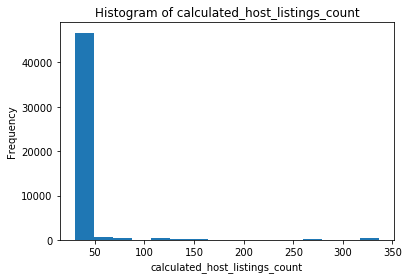

In [257]:
%matplotlib inline
airbnb["calculated_host_listings_count"].hist()

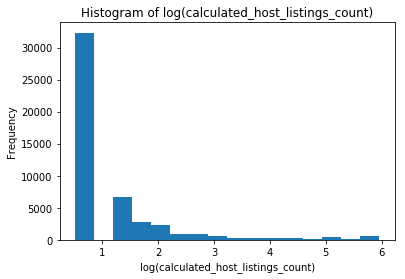

In [258]:
airbnb["calculated_host_listings_count"].log().hist()

Now we will create some aggregations of the data using h2o's group_by function and visualize using open source plotting libraries like matplotlib.

We can use H2O-3 to aggregate our large data.  Once it has been aggregated, it is much smaller and can be easily converted to a pandas dataframe without the concern of running out of memory.

In [259]:
price_by_neighborhood_grp = airbnb.group_by("neighbourhood_group").mean("price").get_frame()
price_by_neighborhood_grp

neighbourhood_group,mean_price
Bronx,87.4968
Brooklyn,124.383
Manhattan,196.876
Queens,99.5176
Staten Island,114.812


In [260]:
import plotly.express as px

In [261]:
plot_data = price_by_neighborhood_grp.as_data_frame(use_pandas=True)
fig = px.bar(plot_data, x = "neighbourhood_group", y = "mean_price")
fig.show()

We now reduce the size of the data using the the H2OAggregatorEstimator and create a density map of the number of airbnb's per longitude/latitude.

In [262]:
from h2o.estimators.aggregator import H2OAggregatorEstimator


# Build an aggregated frame with around 500 records
x = ["latitude", "longitude"]
agg = H2OAggregatorEstimator(target_num_exemplars = 500, save_mapping_frame = True)
agg.train(training_frame=airbnb, x = x)

# Use the aggregated model to create a new dataframe using aggregated_frame
small_airbnb = agg.aggregated_frame

aggregator Model Build progress: |████████████████████████████████████████| 100%


In [263]:
small_airbnb_pd = small_airbnb.as_data_frame(use_pandas = True)

In [264]:
small_airbnb.dim

[580, 17]

In [265]:
# heatmap of price by location
fig = px.density_mapbox(small_airbnb_pd, lat='latitude', lon='longitude', z='counts', radius=10,
                        center=dict(lat=small_airbnb_pd.latitude.median(), lon=small_airbnb_pd.longitude.median()), 
                        zoom=9,
                        mapbox_style="stamen-terrain")
fig.show()

## Step 2: Feature Engineering

If we review the dataset, we can see that the column `name` might be helpful in predicting price since it tells us more about the listing. Machine learning algorithms, however, cannot inherently handle text columns so we will first need to pre-process this feature.  Here we will use Word2Vec to do the pre-processing.

In [266]:
airbnb["name"]

name
Clean & quiet apt home by the park
Skylit Midtown Castle
THE VILLAGE OF HARLEM....NEW YORK !
Cozy Entire Floor of Brownstone
Entire Apt: Spacious Studio/Loft by central park
Large Cozy 1 BR Apartment In Midtown East
BlissArtsSpace!
Large Furnished Room Near B'way
Cozy Clean Guest Room - Family Apt
Cute & Cozy Lower East Side 1 bdrm


In [267]:
from nltk.corpus import stopwords
STOP_WORDS = stopwords.words('english')
STOP_WORDS[0:5]

['i', 'me', 'my', 'myself', 'we']

In [268]:
def tokenize(sentences, stop_words = STOP_WORDS):
    tokenized = sentences.tokenize("\\W+")
    tokenized_lower = tokenized.tolower()
    tokenized_filtered = tokenized_lower[(tokenized_lower.nchar() >= 2) | (tokenized_lower.isna()),:]
    tokenized_words = tokenized_filtered[tokenized_filtered.grep("[0-9]",invert=True,output_logical=True),:]
    tokenized_words = tokenized_words[(tokenized_words.isna()) | (~ tokenized_words.isin(stop_words)),:]
    return tokenized_words

In [269]:
# Break desc into sequence of words
names = tokenize(airbnb["name"].ascharacter())

In [270]:
names

C1
clean
quiet
apt
home
park
""
skylit
midtown
castle
""


In [271]:
from h2o.estimators.word2vec import H2OWord2vecEstimator

# This takes time to run - left commented out
w2v_model = H2OWord2vecEstimator(vec_size = 100, model_id = "w2v.hex")
w2v_model.train(training_frame=names)

word2vec Model Build progress: |██████████████████████████████████████████| 100%


In [272]:
# Sanity check - find synonyms for the word 'large'
w2v_model.find_synonyms("large", count = 5)

OrderedDict([('spacious', 0.7236642837524414),
             ('big', 0.6033230423927307),
             ('douglaston', 0.5775948166847229),
             ('proper', 0.5746610164642334),
             ('bathrm', 0.5684499740600586)])

In [273]:
# Sanity check - find synonyms for the word 'jfk'
w2v_model.find_synonyms("jfk", count = 5)

OrderedDict([('airport', 0.7740574479103088),
             ('laguardia', 0.7507581114768982),
             ('airports', 0.7232791185379028),
             ('del', 0.7203145027160645),
             ('lga', 0.7192762494087219)])

In [274]:
# Add word embeddings to dataset
word_embeddings = w2v_model.transform(names, aggregate_method = "AVERAGE")
ext_airbnb = airbnb.cbind(word_embeddings)

In [275]:
ext_airbnb.head()

id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,C15,C16,C17,C18,C19,C20,C21,C22,C23,C24,C25,C26,C27,C28,C29,C30,C31,C32,C33,C34,C35,C36,C37,C38,C39,C40,C41,C42,C43,C44,C45,C46,C47,C48,C49,C50,C51,C52,C53,C54,C55,C56,C57,C58,C59,C60,C61,C62,C63,C64,C65,C66,C67,C68,C69,C70,C71,C72,C73,C74,C75,C76,C77,C78,C79,C80,C81,C82,C83,C84,C85,C86,C87,C88,C89,C90,C91,C92,C93,C94,C95,C96,C97,C98,C99,C100
2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.6475,-73.9724,Private room,149,1,9,2018-10-19 00:00:00,0.21,6,365,-0.0178391,-0.0767163,0.206293,-0.0302384,0.00254587,0.106907,-0.0863028,-0.361024,0.0339243,0.0291278,-0.160812,-0.287266,0.266776,0.187327,-0.0251311,-0.0192201,0.0126559,-0.0224633,-0.174198,-0.201168,-0.0352843,0.0849452,0.0276145,-0.0108308,-0.0693741,0.0303754,0.211696,0.00306098,-0.103745,0.0912081,-0.085172,-0.196108,-0.00615776,0.169042,-0.0176588,-0.20755,0.089326,-0.0847771,0.217492,0.0733117,-0.139493,0.035787,0.0752454,-0.227576,-0.227903,0.197923,0.176537,0.191313,-0.102017,-0.29619,0.100975,-0.1699,-0.0259403,0.000382572,-0.00379666,0.0332966,-0.139614,-0.00861732,0.0285922,0.174294,0.235979,-0.0079891,-0.0917717,-0.06179,-0.173422,-0.260145,0.000981006,-0.124044,-0.11742,0.0273176,0.163905,-0.009646,-0.0675552,0.12098,-0.138616,-0.0750378,-0.0185383,0.128495,-0.0618829,0.0526601,-0.0706375,0.0290394,0.0786247,0.191649,-0.0379945,0.020829,-0.0985761,-0.00420225,-0.0149608,-0.0833633,-0.0140499,-0.0649895,0.0185829,0.07119,-0.0303391,-0.0143681,-0.00599695,-0.144762,0.121175,-0.09546
2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.7536,-73.9838,Entire home/apt,225,1,45,2019-05-21 00:00:00,0.38,2,355,-0.0155972,-0.0523996,0.109703,0.0330927,-0.0979939,0.0921528,0.246681,-0.161424,0.00512206,-0.0405607,0.00881644,0.0812689,0.104306,0.121316,0.0491711,0.0281354,-0.157629,-0.0796954,0.0267162,-0.206433,-0.014823,-0.0854921,-0.000339729,-0.081447,-0.155186,0.139829,0.163501,0.14744,0.0101101,0.0109214,-0.203884,0.209711,-0.102192,0.0392898,-0.11706,-0.102039,0.0782096,-0.0214458,-0.0329361,0.0831465,-0.142521,0.0501403,0.0915453,-0.102831,-0.0470461,0.0515758,0.0111925,0.179768,-0.0684943,0.0152998,0.131792,-0.0349347,-0.212471,-0.0608156,-0.0427651,0.0793006,-0.0931376,-0.164626,0.241959,0.0615485,0.118279,-0.140307,0.0811743,-0.105805,-0.157587,-0.0626305,-0.107205,0.0298126,-0.0457603,0.0997153,0.0369579,0.0278318,-0.187261,-0.0673557,-0.115354,-0.0376944,0.118519,0.18503,-0.0475285,-0.123814,-0.0940301,-0.148506,0.148234,-0.0692534,-0.132458,0.0776122,-0.141496,-0.0700623,0.140619,0.18897,0.070931,0.0861576,-0.0938348,0.0827297,-0.00546941,-0.0125152,-0.200658,-0.0652965,0.0156504,-0.0257766
3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.809,-73.9419,Private room,150,3,0,,nan,1,365,-0.104461,-0.0308133,0.146957,-0.0336716,-0.100542,0.0470171,0.361474,-0.162655,-0.191613,0.228573,-0.293649,0.103856,0.310937,0.000454105,-0.0436866,-0.0726488,-0.0445564,-0.301698,-0.0841636,-0.335023,-0.0385708,0.0548308,-0.183659,-0.0276715,0.214852,-0.152113,0.304821,-0.0698794,-0.16638,0.124689,-0.0906122,0.230468,-0.5021,-0.303373,-0.0414653,-0.188615,-0.000331037,0.113011,0.00748738,0.123185,0.020859,0.00756726,0.0960231,-0.171871,-0.241959,0.251559,0.100478,-0.0890586,-0.128321,-0.0156307,0.253839,-0.260049,-0.010655,-0.0354059,0.157474,0.046917,-0.0694733,-0.218739,0.0895268,-0.0476232,-0.0702695,-0.175395,-0.0690733,0.0221705,-0.141899,-0.225246,-0.073788,0.0733962,0.0554827,-0.100805,-0.0601269,-0.300355,-0.317613,-0.129374,-0.000975613,0.098694,-0.0138858,0.185016,0.0192756,-0.159793,-0.0407697,-0.301879,0.138904,-0.00965655,-0.162843,0.107727,-0.161983,-0.0995584,0.127788,0.101442,0.236484,-0.028516,-0.115807,0.24212,0.227332,-0.148782,-0.0557305,-0.151765,0

## Step 3: Run AutoML

We will use AutoML to perform automatic grid search and algorithm selection on this dataset.  Our goal is to find the model that is most accurate in predicting price.

In [276]:
from h2o.automl import H2OAutoML

x = list(set(ext_airbnb.col_names) - set(["id", "host_name", "name", "price"]))

automl = H2OAutoML(project_name="airbnb_word_embeddings", 
                   max_models=5, # small for demo purposes
                   max_runtime_secs=300,
                   sort_metric="MAE",
                   exclude_algos=["StackedEnsemble"]
                  )
automl.train(training_frame=ext_airbnb, y = "price", x = x)

AutoML progress: |████████████████████████████████████████████████████████| 100%


In [277]:
automl.leaderboard

model_id,mae,mean_residual_deviance,rmse,mse,rmsle
XGBoost_3_AutoML_20200603_145721,70.7598,56237.1,237.144,56237.1,0.596819
GLM_1_AutoML_20200603_145721,71.0398,50204.7,224.064,50204.7,nan
DRF_1_AutoML_20200603_145721,78.5304,72655.3,269.546,72655.3,0.561155
XGBoost_1_AutoML_20200603_145721,83.7559,58438,241.74,58438,nan
XGBoost_2_AutoML_20200603_145721,111.29,65883,256.677,65883,1.26571


In [278]:
model = automl.leader

## Step 4: Interpret our Model

Now that we have chosen our model based on the Mean Absolute Error, we can analyze the model and determine how it predicts price.

We first look at the most important variables in the model and how those variables affect the price prediction.

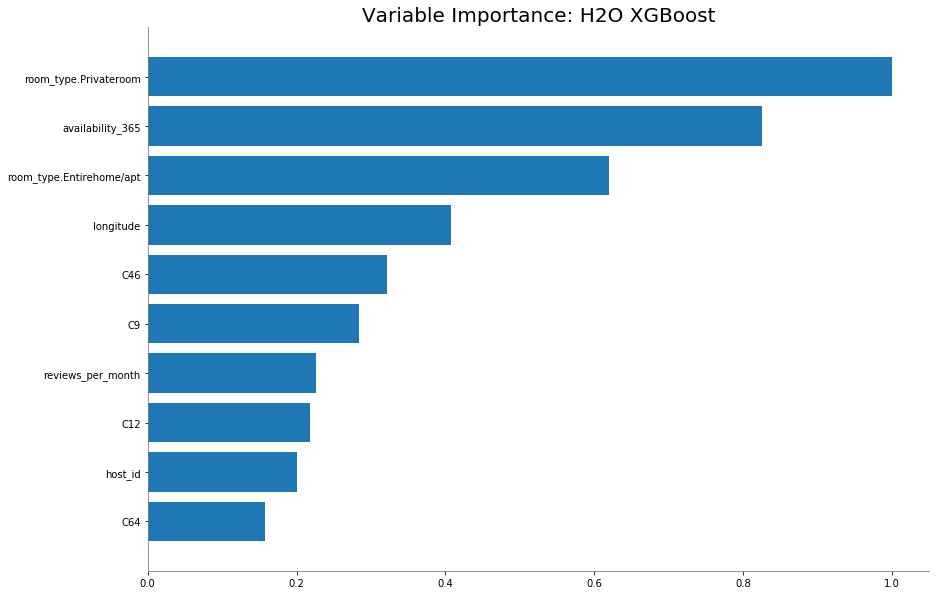

In [279]:
model.varimp_plot()

PartialDependencePlot progress: |█████████████████████████████████████████| 100%

PartialDependence: Partial Dependence Plot of model XGBoost_3_AutoML_20200603_145721 on column 'room_type'.


,room_type,mean_response,stddev_response,std_error_mean_response
0,Entire home/apt,101.539330,40.689900,0.184015
1,Private room,49.053205,33.238009,0.150315
2,Shared room,68.370854,40.763259,0.184347


[]

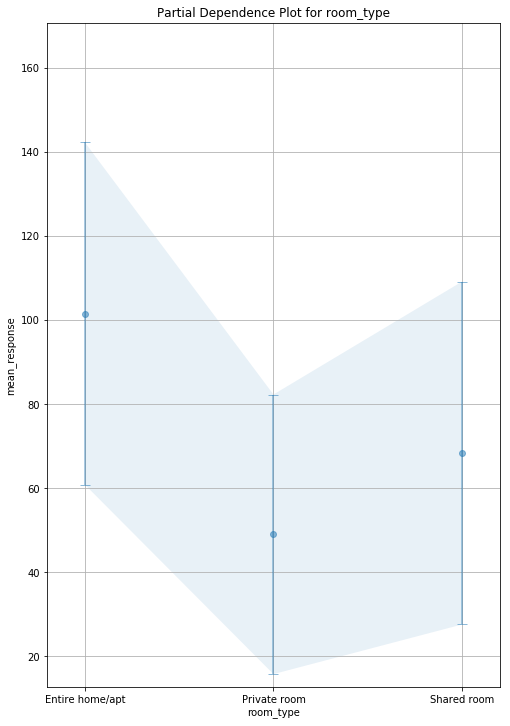

In [280]:
model.partial_plot(ext_airbnb, cols = ["room_type"])

PartialDependencePlot progress: |█████████████████████████████████████████| 100%

PartialDependence: Partial Dependence Plot of model XGBoost_3_AutoML_20200603_145721 on column 'availability_365'.


,availability_365,mean_response,stddev_response,std_error_mean_response
0,0.000000,76.669962,45.733921,0.206827
1,19.210526,76.669962,45.733921,0.206827
2,38.421053,76.669962,45.733921,0.206827
3,57.631579,76.669962,45.733921,0.206827
4,76.842105,76.669962,45.733921,0.206827
5,96.052632,76.305444,38.917909,0.176002
6,115.263158,76.305444,38.917909,0.176002
7,134.473684,76.305444,38.917909,0.176002
8,153.684211,76.305444,38.917909,0.176002
9,172.894737,76.305444,38.917909,0.176002


[]

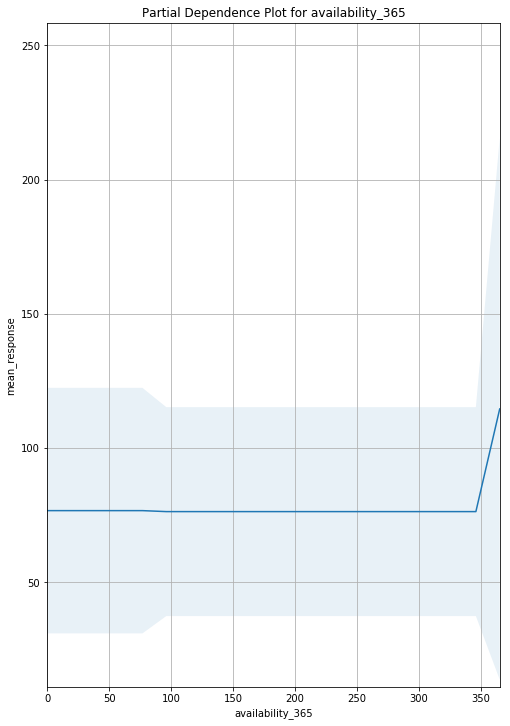

In [281]:
model.partial_plot(ext_airbnb, cols = ["availability_365"])

Now we will use Shapley contributions to generate reason codes around why the model predicted a specific price.

In [283]:
shapley_contribs = model.predict_contributions(ext_airbnb)
shapley_contribs = ext_airbnb["price"].cbind(shapley_contribs)
shapley_contribs.head()

contributions progress: |█████████████████████████████████████████████████| 100%


price,neighbourhood.Allerton,neighbourhood.Arden Heights,neighbourhood.Arrochar,neighbourhood.Arverne,neighbourhood.Astoria,neighbourhood.Bath Beach,neighbourhood.Battery Park City,neighbourhood.Bay Ridge,neighbourhood.Bay Terrace,"neighbourhood.Bay Terrace, Staten Island",neighbourhood.Baychester,neighbourhood.Bayside,neighbourhood.Bayswater,neighbourhood.Bedford-Stuyvesant,neighbourhood.Belle Harbor,neighbourhood.Bellerose,neighbourhood.Belmont,neighbourhood.Bensonhurst,neighbourhood.Bergen Beach,neighbourhood.Boerum Hill,neighbourhood.Borough Park,neighbourhood.Breezy Point,neighbourhood.Briarwood,neighbourhood.Brighton Beach,neighbourhood.Bronxdale,neighbourhood.Brooklyn Heights,neighbourhood.Brownsville,neighbourhood.Bull's Head,neighbourhood.Bushwick,neighbourhood.Cambria Heights,neighbourhood.Canarsie,neighbourhood.Carroll Gardens,neighbourhood.Castle Hill,neighbourhood.Castleton Corners,neighbourhood.Chelsea,neighbourhood.Chinatown,neighbourhood.City Island,neighbourhood.Civic Center,neighbourhood.Claremont Village,neighbourhood.Clason Point,neighbourhood.Clifton,neighbourhood.Clinton Hill,neighbourhood.Co-op City,neighbourhood.Cobble Hill,neighbourhood.College Point,neighbourhood.Columbia St,neighbourhood.Concord,neighbourhood.Concourse,neighbourhood.Concourse Village,neighbourhood.Coney Island,neighbourhood.Corona,neighbourhood.Crown Heights,neighbourhood.Cypress Hills,neighbourhood.DUMBO,neighbourhood.Ditmars Steinway,neighbourhood.Dongan Hills,neighbourhood.Douglaston,neighbourhood.Downtown Brooklyn,neighbourhood.Dyker Heights,neighbourhood.East Elmhurst,neighbourhood.East Flatbush,neighbourhood.East Harlem,neighbourhood.East Morrisania,neighbourhood.East New York,neighbourhood.East Village,neighbourhood.Eastchester,neighbourhood.Edenwald,neighbourhood.Edgemere,neighbourhood.Elmhurst,neighbourhood.Eltingville,neighbourhood.Emerson Hill,neighbourhood.Far Rockaway,neighbourhood.Fieldston,neighbourhood.Financial District,neighbourhood.Flatbush,neighbourhood.Flatiron District,neighbourhood.Flatlands,neighbourhood.Flushing,neighbourhood.Fordham,neighbourhood.Forest Hills,neighbourhood.Fort Greene,neighbourhood.Fort Hamilton,neighbourhood.Fort Wadsworth,neighbourhood.Fresh Meadows,neighbourhood.Glendale,neighbourhood.Gowanus,neighbourhood.Gramercy,neighbourhood.Graniteville,neighbourhood.Grant City,neighbourhood.Gravesend,neighbourhood.Great Kills,neighbourhood.Greenpoint,neighbourhood.Greenwich Village,neighbourhood.Grymes Hill,neighbourhood.Harlem,neighbourhood.Hell's Kitchen,neighbourhood.Highbridge,neighbourhood.Hollis,neighbourhood.Holliswood,neighbourhood.Howard Beach,neighbourhood.Howland Hook,neighbourhood.Huguenot,neighbourhood.Hunts Point,neighbourhood.Inwood,neighbourhood.Jackson Heights,neighbourhood.Jamaica,neighbourhood.Jamaica Estates,neighbourhood.Jamaica Hills,neighbourhood.Kensington,neighbourhood.Kew Gardens,neighbourhood.Kew Gardens Hills,neighbourhood.Kingsbridge,neighbourhood.Kips Bay,neighbourhood.Laurelton,neighbourhood.Lighthouse Hill,neighbourhood.Little Italy,neighbourhood.Little Neck,neighbourhood.Long Island City,neighbourhood.Longwood,neighbourhood.Lower East Side,neighbourhood.Manhattan Beach,neighbourhood.Marble Hill,neighbourhood.Mariners Harbor,neighbourhood.Maspeth,neighbourhood.Melrose,neighbourhood.Middle Village,neighbourhood.Midland Beach,neighbourhood.Midtown,neighbourhood.Midwood,neighbourhood.Mill Basin,neighbourhood.Morningside Heights,neighbourhood.Morris Heights,neighbourhood.Morris Park,neighbourhood.Morrisania,neighbourhood.Mott Haven,neighbourhood.Mount Eden,neighbourhood.Mount Hope,neighbourhood.Murray Hill,neighbourhood.Navy Yard,neighbourhood.Neponsit,neighbourhood.New Brighton,neighbourhood.New Dorp,neighbourhood.New Dorp Beach,neighbourhood.New Springville,neighbourhood.NoHo,neighbourhood.Nolita,neighbourhood.North Riverdale,neighbourhood.Norwood,neighbourhood.Oakwood,neighbourhood.Olinville,neighbourhood.Ozone Park,neighbourhood.Park Slope,neighbourhood.Parkchester,ne

In [295]:
def examine_top_rc(record):
    
    rc = record[0, list(set(record.col_names) - set(["price", "BiasTerm"]))]
    rc = rc.as_data_frame(use_pandas = True).transpose().reset_index()
    rc.columns = ["column", "contribution"]
    rc = rc.reindex(rc.contribution.abs().sort_values(ascending = False).index)
    
    return rc

In [297]:
examine_top_rc(shapley_contribs[0, :]).head()

,column,contribution
211,room_type.Entire home/apt,-25.292227
264,availability_365,15.791730
124,room_type.Private room,-13.021234
30,neighbourhood_group.Manhattan,-6.914857
239,C12,-4.539287


In [300]:
airbnb[0, :]

id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.6475,-73.9724,Private room,149,1,9,2018-10-19 00:00:00,0.21,6,365


Now we can build a surrogate decision tree model to explain at a high level how our model is predicting price.

In [326]:
surrogate_dt_data = model.predict(ext_airbnb).cbind(ext_airbnb)

xgboost prediction progress: |████████████████████████████████████████████| 100%


In [332]:
from h2o.estimators.random_forest import H2ORandomForestEstimator

dt = H2ORandomForestEstimator(model_id="surrogate.hex",
                              ntrees=1, max_depth=3,
                              sample_rate=1,
                              categorical_encoding="one_hot_explicit",
                              mtries=112)
dt.train(y="predict", training_frame=surrogate_dt_data, x=x)

drf Model Build progress: |███████████████████████████████████████████████| 100%


In [333]:
import os
import subprocess
from IPython.display import Image
def generateTreeImage(model, tree_number):
    # Download MOJO
    mojo_path = model.download_mojo(get_genmodel_jar=True)
    directory = os.path.dirname(mojo_path)
    h2o_jar_path = os.path.join(directory, "h2o-genmodel.jar")
    # Create Graphviz file
    gv_file_path = os.path.join(directory, "decision_tree.gv")
    gv_call = " ".join(["java", "-cp", h2o_jar_path, "hex.genmodel.tools.PrintMojo", "--tree", str(tree_number), "-i", mojo_path , "-o", gv_file_path])
    result = subprocess.call(gv_call, shell=True)
    result = subprocess.call(["ls", gv_file_path], shell = False)
    result = subprocess.call(["dot", "-Tpng", gv_file_path, "-o decision_tree.png"], shell=False)
    result = subprocess.call(["ls","decision_tree.png"], shell = False)
    
    return Image(" decision_tree.png")

The decision tree shows us three segments of the data on the right with higher than average price.  These are listings with:
* C69 >= 0.0167
* room_type = "home/apt"

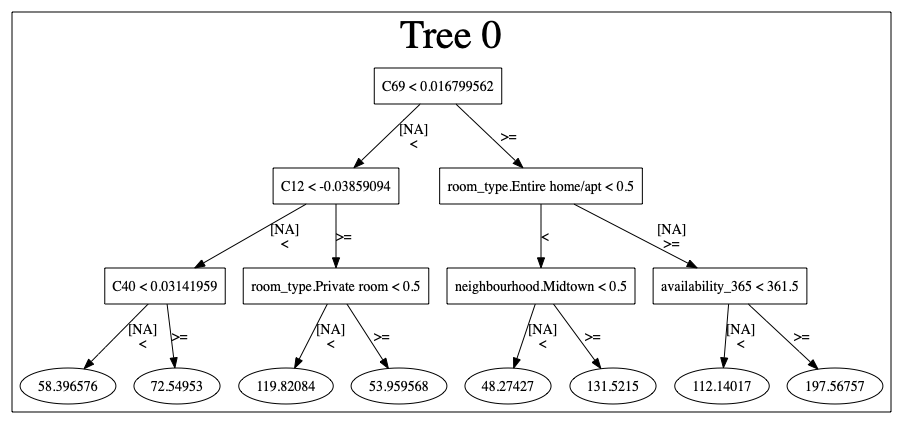

In [334]:
generateTreeImage(dt, 0)

We can use our Word2Vec model again to see which words have high C69 and C12 values to determine why this feature is so important in predicting price.

In [338]:
# Get Word Embeddings per Word
unique_words = names.asfactor().unique().ascharacter()
unique_words.col_names = ["name"]
word_embeddings = w2v_model.transform(unique_words, aggregate_method="None")
word_embeddings = unique_words.cbind(word_embeddings)
word_embeddings = word_embeddings[~(word_embeddings["C69"].isna())]

In [344]:
word_embeddings[["name", "C69"]].sort(by="C69", ascending=[False])

name,C69
professionals,0.780826
view,0.693343
hudson,0.599203
ave,0.58502
high,0.583406
bedford,0.578053
penthouse,0.566686
views,0.557124
multi,0.532083
luxury,0.504097


In [345]:
word_embeddings[["name", "C12"]].sort(by="C12", ascending=[False])

name,C12
blueground,0.794744
wyndham,0.753197
indoor,0.602927
union,0.588891
pool,0.588137
midtown,0.577057
terrace,0.565009
box,0.562298
club,0.55298
roofdeck,0.511236


In [346]:
h2o.cluster().shutdown()

H2O session _sid_8f85 closed.
